## Load the dataset

**Dataset Link:**
**https://www.kaggle.com/datasets/taeefnajib/house-rent-in-dhaka-city/data**

In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [495]:
df=pd.read_csv('houserentdhaka.csv')
df.head()

,Unnamed: 0,Location,Area,Bed,Bath,Price
0,0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


**We need to drop unnamed: 0 column because it doesnt put any impact in our prediction**

In [496]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


**Now we check is there any missing vaules in dataframe**

In [497]:
df.isnull().sum()

Location    0
Area        0
Bed         0
Bath        0
Price       0
dtype: int64

**Now we can see our dataset have two columns named Price and Area where we need just the number, not that string like- Thousand,sqft etc. So now we clean that**

In [498]:
multiplier= {
    'Thousand': 1000,
    'Lakh': 100000,
    'Million': 1000000,
    'Crore': 10000000
}

def clean_price(price):
    parts = str(price).split()

    if len(parts)==2:
        num,prefix = parts
        return float(num) * multiplier.get(prefix,1)
    else:
        return float(parts[0])

df['Price']=df['Price'].apply(clean_price)

In [499]:
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20000.0
1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20000.0
2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18000.0
3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75000.0
4,"Baridhara, Dhaka","2,200 sqft",3,3,75000.0


In [500]:
df['Area']=df['Area'].str.replace(',','').str.replace('sqft','').astype(int)

In [501]:
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20000.0
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20000.0
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18000.0
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75000.0
4,"Baridhara, Dhaka",2200,3,3,75000.0


In [502]:
df['Area'].dtype

dtype('int64')

**Add a column name price_per_sqft**

In [503]:
df['Price_per_sqft']=df['Price']/df['Area']
df.head()

,Location,Area,Bed,Bath,Price,Price_per_sqft
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20000.0,12.500000
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20000.0,22.222222
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18000.0,14.400000
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75000.0,34.090909
4,"Baridhara, Dhaka",2200,3,3,75000.0,34.090909


**Now we need to work on Location Column**

**At first we check if all location ended with dhaka or not**

In [504]:
df['Location'].str.strip().str.endswith('Dhaka').all()  ## if this return false that mean all column doesnt ended with Dhaka
                                                        ## if return true then that means all column ended with Dhaka string

np.True_

**It means all of our location column ended with Dhaka, So now we should remove it.**

In [505]:
df['Location']=df['Location'].str.strip().str.removesuffix(", Dhaka")

In [506]:
df.head()

,Location,Area,Bed,Bath,Price,Price_per_sqft
0,"Block H, Bashundhara R-A",1600,3,3,20000.0,12.500000
1,"Farmgate, Tejgaon",900,2,2,20000.0,22.222222
2,"Block B, Nobodoy Housing Society, Mohammadpur",1250,3,3,18000.0,14.400000
3,"Gulshan 1, Gulshan",2200,3,4,75000.0,34.090909
4,Baridhara,2200,3,3,75000.0,34.090909


**Before further going now we will check what is the condition in our current dataframe**

In [507]:
df.Area.isnull().sum()

np.int64(0)

In [508]:
df.Bed.isnull().sum()

np.int64(0)

In [509]:
df.Bath.isnull().sum()

np.int64(0)

In [510]:
df.Price.isnull().sum()

np.int64(0)

In [511]:
df.Price_per_sqft.isna().sum()

np.int64(0)

**So all of these column has values, so now we move on next step to work on Location column to make it more usable**

**So now we can look towards bigger picture like a location called 'Bashundhara R-A' not very specific like 'Block H, Bashundhara R-A'. Beacuse the rent price is almost similar.**

In [512]:
df['Location']=df['Location'].apply(lambda x:x.split(',')[-1].strip())

In [513]:
df.head()

,Location,Area,Bed,Bath,Price,Price_per_sqft
0,Bashundhara R-A,1600,3,3,20000.0,12.500000
1,Tejgaon,900,2,2,20000.0,22.222222
2,Mohammadpur,1250,3,3,18000.0,14.400000
3,Gulshan,2200,3,4,75000.0,34.090909
4,Baridhara,2200,3,3,75000.0,34.090909


**How many unique values are there in a column and what is that?**

In [514]:
df['Location'].unique()

array(['Bashundhara R-A', 'Tejgaon', 'Mohammadpur', 'Gulshan',
       'Baridhara', 'Hazaribag', 'Mirpur', 'Nikunja', 'Uttara',
       'Khilgaon', 'Ibrahimpur', 'Badda', 'Adabor', 'Jatra Bari',
       'Malibagh', 'Banani', 'Kakrail', 'Dhanmondi', 'Maghbazar',
       'Kalachandpur', 'Niketan', 'Eskaton', 'Banasree', 'Bashabo',
       'Baridhara DOHS', 'Aftab Nagar', 'Lalmatia', 'Dakshin Khan',
       'Mohakhali DOHS', 'Sutrapur', 'Hatirpool', 'Agargaon', 'Rampura',
       'Cantonment', 'Shahbagh', 'Khilkhet', 'Motijheel', 'Shantinagar',
       'Shegunbagicha', 'Kathalbagan', 'Shyamoli', 'Kalabagan', 'Demra',
       'Kuril', 'Mohakhali', 'Lalbagh', 'New Market', 'Kafrul',
       'Kachukhet', 'Turag', 'Dhaka', 'Nadda', 'Shyampur', 'Maniknagar',
       'Banani DOHS', 'Shiddheswari', 'Bangshal', 'Paribagh',
       'Joar Sahara', 'Mugdapara', 'North Shahjahanpur', 'Kotwali',
       'Shahjahanpur', 'Uttar Khan', 'Taltola', 'Sadarghat',
       'Banglamotors', 'Zafrabad', 'Keraniganj'], dtype=ob

In [515]:
df['Location'].nunique()

69

In [516]:
df['Location'].value_counts()

Location
Mirpur             8451
Mohammadpur        3612
Uttara             2070
Badda              1831
Bashundhara R-A    1397
                   ... 
Demra                 7
Zafrabad              7
Keraniganj            3
Banglamotors          2
Sadarghat             2
Name: count, Length: 69, dtype: int64

In [517]:
df['Price_per_sqft'].describe()

count    28800.000000
mean        19.014673
std          6.551902
min          6.500000
25%         15.384615
50%         18.055556
75%         21.052632
max        228.571429
Name: Price_per_sqft, dtype: float64

**We keep 10 to 40 as a threshold for Price_per_sqft column**

In [518]:
df=df[df['Price_per_sqft'].between(12,40)]
df.shape

(27350, 6)

**At first we consider Bed column, lets see which rows and data seems logical and which one should be removed**

In [519]:
df['Bed'].describe()

count    27350.000000
mean         2.481536
std          0.593214
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Bed, dtype: float64

In [520]:
df['Bed'].unique()

array([3, 2, 4, 1, 5, 6])

**6 bedroom seems logical for large flat or apartment. So we will move further**

**Now we analyze Bath column**

In [521]:
df['Bath'].unique()

array([3, 2, 4, 5, 1, 6])

**We can see that some column has 5 to 8 bathroom while max bedroom is 6.So it is irrelevant. We should remove those rows**

In [522]:
df=df[df['Bath']<=5]
df['Bath'].unique()

array([3, 2, 4, 5, 1])

In [523]:
df['Price'].describe()

count     27345.000000
mean      19462.262205
std       11276.204027
min        5000.000000
25%       13000.000000
50%       16000.000000
75%       22000.000000
max      170000.000000
Name: Price, dtype: float64

In [524]:
q95=df['Price'].quantile(0.95)
df=df[df['Price']<=q95]
df['Price'].describe()

count    26165.000000
mean     17686.965794
std       6779.094465
min       5000.000000
25%      13000.000000
50%      16000.000000
75%      20000.000000
max      40000.000000
Name: Price, dtype: float64

In [525]:
df_under_5000=df[df['Price']<7000]
df_under_5000

,Location,Area,Bed,Bath,Price,Price_per_sqft
194,Adabor,400,1,1,5000.0,12.500000
330,Mirpur,400,1,1,6500.0,16.250000
1204,Dakshin Khan,450,2,1,6300.0,14.000000
1577,Mirpur,500,1,1,6500.0,13.000000
1696,Dakshin Khan,400,2,1,6300.0,15.750000
1714,Mirpur,300,1,1,5500.0,18.333333


**All data for price column seems logical in Dhaka context**

In [526]:
df.shape

(26165, 6)

## Visualize some data

**Visualize for House Price vs Area**

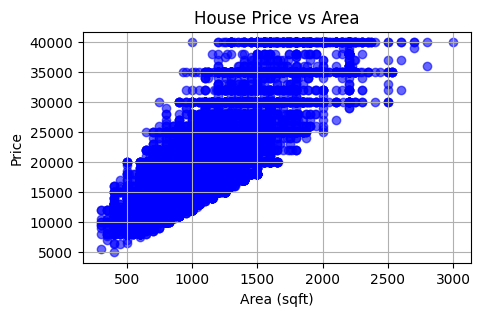

In [527]:
plt.figure(figsize=(5,3))
plt.scatter(df['Area'], df['Price'], alpha=0.6, color='blue')

# Labels and title
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.title('House Price vs Area')

# Optional: grid
plt.grid(True)

# Show plot
plt.show()

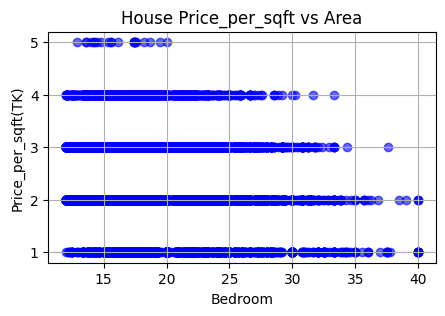

In [528]:
plt.figure(figsize=(5,3))
plt.scatter(df['Price_per_sqft'], df['Bath'], alpha=0.6, color='blue')

# Labels and title
plt.xlabel('Bedroom')
plt.ylabel('Price_per_sqft(TK)')
plt.title('House Price_per_sqft vs Area')

# Optional: grid
plt.grid(True)

# Show plot
plt.show()

**Visualize for bathroom data**

Text(0, 0.5, 'count')

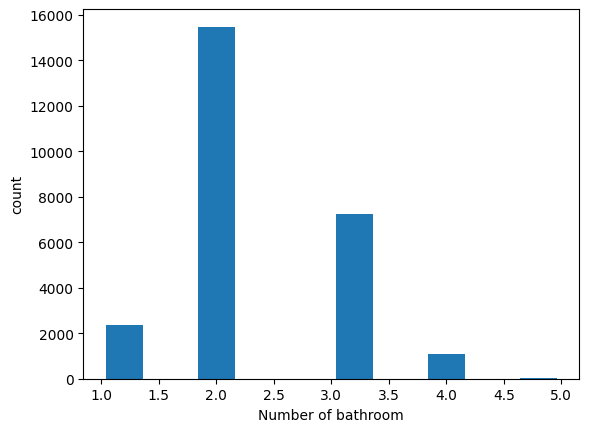

In [529]:
plt.hist(df.Bath,rwidth=0.8)
plt.xlabel("Number of bathroom")
plt.ylabel("count")

**Visualize for bedroom data**

Text(0, 0.5, 'count')

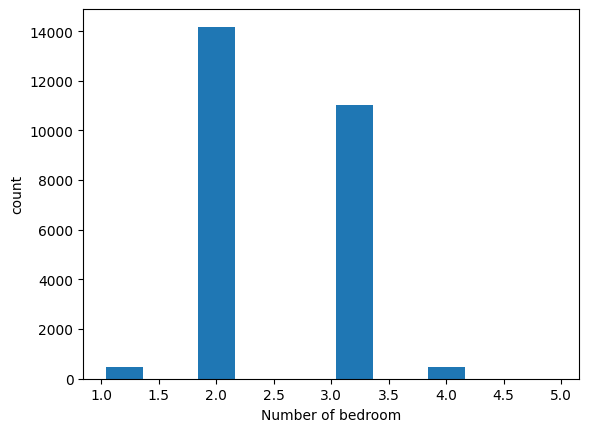

In [530]:
plt.hist(df.Bed,rwidth=0.8)
plt.xlabel("Number of bedroom")
plt.ylabel("count")

## **One hot encoding**

In [531]:
from sklearn.preprocessing import OneHotEncoder
oho=OneHotEncoder(handle_unknown='ignore')

location_encoded=oho.fit_transform(df[['Location']]).toarray()

df_location=pd.DataFrame(location_encoded, columns=oho.get_feature_names_out(['Location']),  index=df.index )

df_encoded=pd.concat([df.drop(['Location'],axis='columns'), df_location],axis='columns')
df_encoded.head()

,Area,Bed,Bath,Price,Price_per_sqft,Location_Adabor,Location_Aftab Nagar,Location_Agargaon,Location_Badda,Location_Banani,...,Location_Shiddheswari,Location_Shyamoli,Location_Shyampur,Location_Sutrapur,Location_Taltola,Location_Tejgaon,Location_Turag,Location_Uttar Khan,Location_Uttara,Location_Zafrabad
0,1600,3,3,20000.0,12.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,900,2,2,20000.0,22.222222,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1250,3,3,18000.0,14.400000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,950,2,2,14000.0,14.736842,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1600,3,3,28000.0,17.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [532]:
df_encoded.isnull().sum()

Area                   0
Bed                    0
Bath                   0
Price                  0
Price_per_sqft         0
                      ..
Location_Tejgaon       0
Location_Turag         0
Location_Uttar Khan    0
Location_Uttara        0
Location_Zafrabad      0
Length: 73, dtype: int64

In [533]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26165 entries, 0 to 28799
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area                         26165 non-null  int64  
 1   Bed                          26165 non-null  int64  
 2   Bath                         26165 non-null  int64  
 3   Price                        26165 non-null  float64
 4   Price_per_sqft               26165 non-null  float64
 5   Location_Adabor              26165 non-null  float64
 6   Location_Aftab Nagar         26165 non-null  float64
 7   Location_Agargaon            26165 non-null  float64
 8   Location_Badda               26165 non-null  float64
 9   Location_Banani              26165 non-null  float64
 10  Location_Banasree            26165 non-null  float64
 11  Location_Banglamotors        26165 non-null  float64
 12  Location_Bangshal            26165 non-null  float64
 13  Location_Baridhara   

**Split feature and target**

In [534]:
X=df_encoded.drop('Price',axis='columns')
y=df_encoded['Price']

In [535]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=15)

**Apply linear regression**

In [536]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**make prediction**

In [537]:
y_pred=model.predict(X_test)
y_pred

array([11317.74310188, 17970.67959798, 22308.6705215 , ...,
       11720.93093695, 15557.59859352, 11568.14675197], shape=(5233,))

In [538]:
model.score(X_test,y_test)

0.9669273162316955

**Cross validation**

In [539]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name}: {scores.mean():.4f}")


Linear Regression: 0.9665
Decision Tree: 0.9990
Random Forest: 0.9996
Gradient Boosting: 0.9973


**Looks overfitting. So now we check it that is it really overfitting or perfect.If train r^2 is so accurate and test is not then its overfitting**

In [540]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("Train R²:", model.score(X_train, y_train))
print("Test R²:", model.score(X_test, y_test))


Train R²: 0.9999420840891907
Test R²: 0.9997797446654945


**So it looks perfect, again we check it through adding noise**

In [542]:
import numpy as np

# Make a copy of X
X_noisy = X.copy()

# Add small Gaussian noise (1–5% of the value)
for col in ['Area', 'Price_per_sqft']:
    X_noisy[col] = X_noisy[col] * (1 + 0.01 * np.random.randn(len(X)))

# Evaluate model on noisy features
model.fit(X, y)
print("R² on noisy data:", model.score(X_noisy, y))


R² on noisy data: 0.997606717674598


**So finally we can conclude that dataset is not overfit, it just perfect**

**Now we export our model**

In [543]:
import pickle
with open("house_rent_price_in_Dhaka", 'wb') as f:
    pickle.dump(model,f)